In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## 6. Answer

Blow is a function implementing perceptron algorithm. I make some changes compared to the original algorithm. First, there is a leanring rate to avoid overshooting. Second, the algorithm will not test next data point until the current one is correctly classified. After the algorithm, there is an example to test this algorithm. 

In [2]:
def perceptron(X, y, eta = 0.01, iters=1e5):
    '''
    Input: 
    X: array, with n observations.
    Y: array, labels corresponding to each data point in X.
    eta: float, Learning rate.
    iters: int, number of iterations.
    '''
    n = X.shape[1]
    w = np.zeros(n+1)
    XX = np.c_[X, np.ones((X.shape[0],1))]
    iter = 0
    while iter != iters:
        w_old = w
        for x, d in zip(XX, y):
            y_ = np.sign(np.dot(x, w))
            if d != y_:
                w = w_old + eta/2 * (d - y_)*x
                break
        iter += 1
        if np.sum(w - w_old) == 0:
            return w, iter
    print('Too many iterations')

Below is an example. I first make up some data points, and then show the algorithm I developed can correctly classify these two clusters.

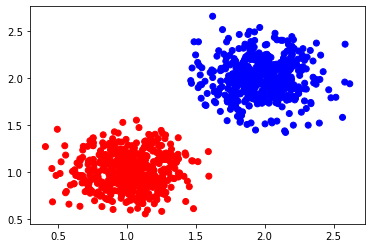

In [3]:
centers = [[1, 1],  [2,2]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.2, random_state=66)

plt.scatter(X[:,0], X[:,1], c=[['r', 'b'][i] for i in y]);

In [4]:
yy = np.where(y==1, 1, -1)
w, iters = perceptron(X, yy)
print('Total iterations: {}'.format(iters))

Total iterations: 40


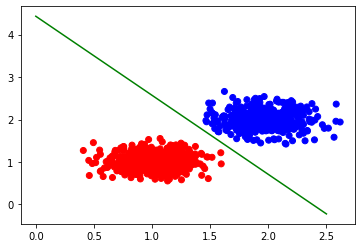

In [5]:
x1 = np.linspace(0, 2.5, 300)
x2 = -w[0]/w[1]*x1 - w[2]/w[1] 
plt.scatter(X[:,0], X[:,1], c=[['r', 'b'][i] for i in y])
plt.plot(x1, x2, c='g');

As can be seen above, two clusters are correctly classfied by the algorithm and it just takes 40 iterations to converge.